<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Task 1: Load dataset
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import io
from google.colab import files

In [20]:
# 2️⃣ Upload the dataset from local machine
uploaded = files.upload()  # This will prompt you to choose the file

# 3️⃣ Load the uploaded CSV
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving abalone.data to abalone.data


In [21]:
# 3️⃣ Define column names (from UCI documentation)
columns = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

# 4️⃣ Load the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name]), header=None, names=columns)


In [22]:
# Task 2 Data Preprocessing and Exploration
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# 1 Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows:
  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3 

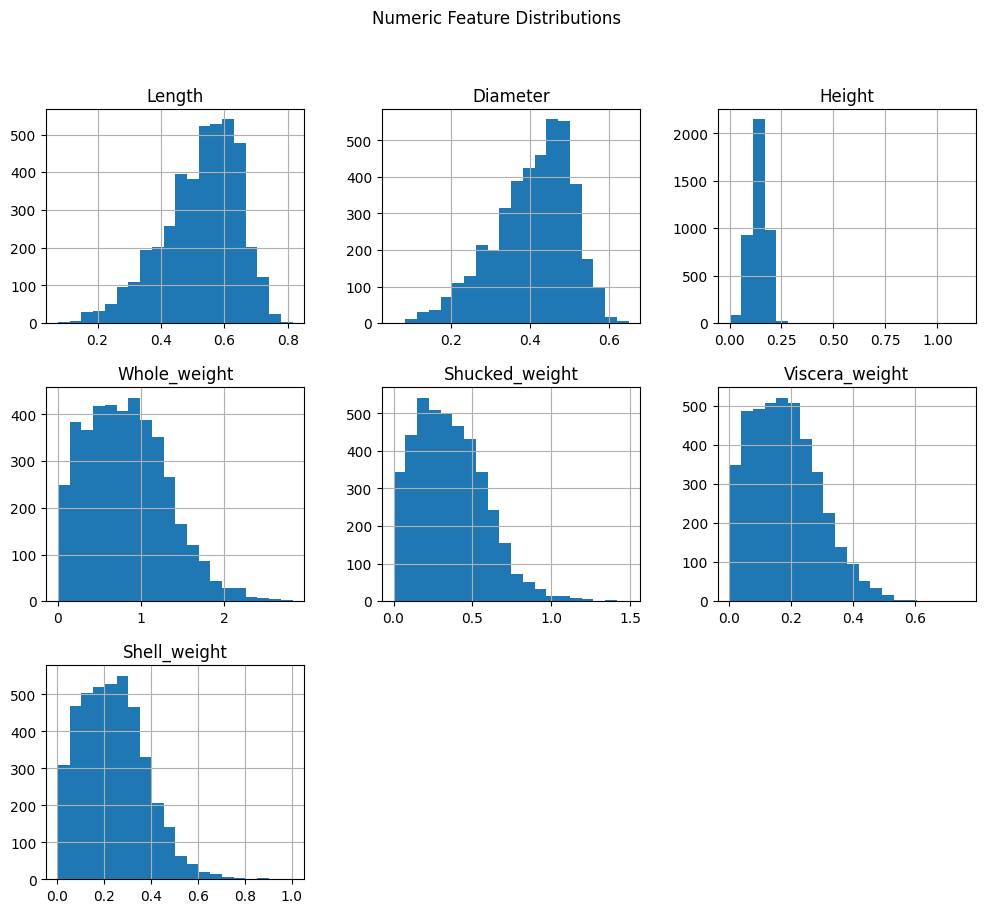

In [23]:
# 2 Encode categorical variable 'Sex' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)  # drop_first=True to avoid dummy variable trap

# 3 Visualize numeric feature distributions
numeric_features = df_encoded.drop('Rings', axis=1)
numeric_features.hist(bins=20, figsize=(12,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

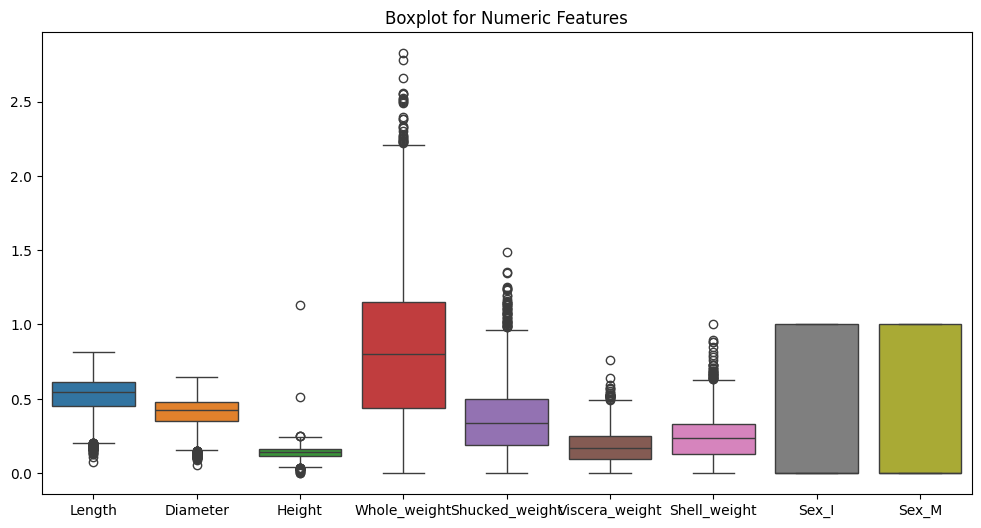

In [24]:
# 4 Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_features)
plt.title("Boxplot for Numeric Features")
plt.show()

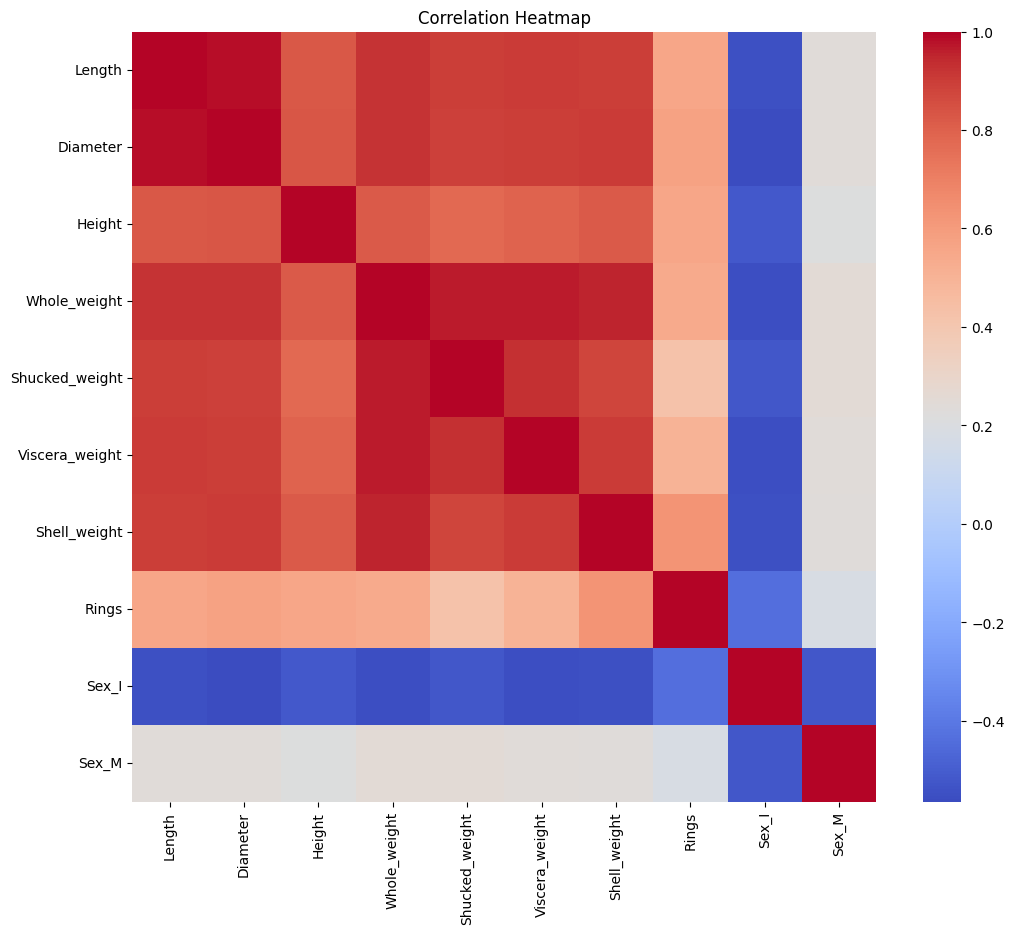

In [25]:
# 5 Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [26]:
# 6 Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)
df_scaled = pd.DataFrame(X_scaled, columns=numeric_features.columns)
df_scaled['Rings'] = df_encoded['Rings']

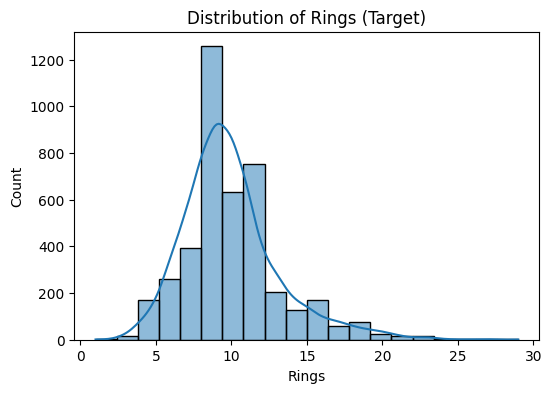

In [27]:
# Optional: check Rings distribution (target)
plt.figure(figsize=(6,4))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title("Distribution of Rings (Target)")
plt.show()

In [29]:
# 7 Split data into train/test sets
X = df_scaled.drop('Rings', axis=1)
y = df_scaled['Rings']  # Regression task

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 3341
Testing samples: 836


In [30]:
#Task 3 Model Selection and Development
# Regression Example: Predicting Rings
# 1️⃣ Import regression models and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ Initialize model
rf_reg = RandomForestRegressor(random_state=42)

# 3️⃣ Train model
rf_reg.fit(X_train, y_train)

# 4️⃣ Predict on test set
y_pred = rf_reg.predict(X_test)

# 5️⃣ Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 6️⃣ Optional: Cross-validation
cv_scores = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average CV R^2 score: {np.mean(cv_scores):.2f}")

# 7️⃣ Hyperparameter tuning (GridSearch)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid,
                           cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)


Mean Squared Error: 5.10
R^2 Score: 0.53
Cross-validation R^2 scores: [0.51353707 0.55701141 0.55466847 0.5480842  0.51546781]
Average CV R^2 score: 0.54
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


For the regression task, I used a Random Forest Regressor to predict the number of Rings (which approximates the age of the abalone).
After hyperparameter tuning with GridSearchCV, the best model achieved a test MSE of 5.10 and an R² score of 0.53, with an average cross-validation R² of 0.54.
This indicates that the model can explain around 53–54% of the variance in the target variable. The cross-validation scores are close to the test score, suggesting that the model is relatively stable and not heavily overfitting.

In [31]:
# Classification Example: Converting Rings into Categories
# Convert Rings into 3 categories: young, adult, old
bins = [0, 8, 12, np.max(y)]
labels = ['Young', 'Adult', 'Old']
y_class = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

# Split again for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Import classification models and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_cls = RandomForestClassifier(random_state=42)

# Train model
rf_cls.fit(X_train_cls, y_train_cls)

# Predict
y_pred_cls = rf_cls.predict(X_test_cls)

# Evaluate
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))

# Optional: Cross-validation
cv_scores_cls = cross_val_score(rf_cls, X_train_cls, y_train_cls, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores_cls}")
print(f"Average CV accuracy: {np.mean(cv_scores_cls):.2f}")


Classification Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

       Adult       0.69      0.82      0.75       416
         Old       0.62      0.45      0.53       139
       Young       0.81      0.71      0.76       281

    accuracy                           0.72       836
   macro avg       0.71      0.66      0.68       836
weighted avg       0.72      0.72      0.72       836


Confusion Matrix:
 [[340  36  40]
 [ 70  63   6]
 [ 80   2 199]]
Cross-validation accuracy scores: [0.72197309 0.6991018  0.71107784 0.70209581 0.70808383]
Average CV accuracy: 0.71


For the classification task, I transformed the continuous Rings value into three age categories: Young, Adult, and Old. I trained a Random Forest Classifier and achieved an overall accuracy of 72% on the test set, with an average cross-validation accuracy of 71%, indicating consistent performance.

The model performs best on the Young and Adult classes, with F1-scores of 0.76 and 0.75, respectively. Performance on the Old class is weaker (F1-score = 0.53), which can be seen in the confusion matrix where many Old samples are misclassified as Adult. This may be due to fewer samples in the Old class and overlapping feature distributions.

In [32]:
# Task 4 Model Evaluation and Optimization
#  1. Final evaluation of the classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Basic test set metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls, average='weighted')
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1-score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_cls))


Test Accuracy: 0.72
Weighted Precision: 0.72
Weighted Recall: 0.72
Weighted F1-score: 0.72

Classification Report:
              precision    recall  f1-score   support

       Adult       0.69      0.82      0.75       416
         Old       0.62      0.45      0.53       139
       Young       0.81      0.71      0.76       281

    accuracy                           0.72       836
   macro avg       0.71      0.66      0.68       836
weighted avg       0.72      0.72      0.72       836



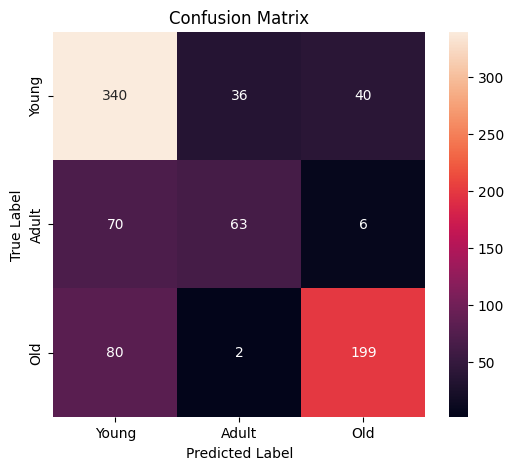

Cross-validation accuracy scores: [0.72197309 0.6991018  0.71107784 0.70209581 0.70808383]
Average CV accuracy: 0.71


In [33]:
# 2. Confusion matrix visualization
cm = confusion_matrix(y_test_cls, y_pred_cls)
cm_df = pd.DataFrame(cm, index=y_test_cls.unique(), columns=y_test_cls.unique())

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 3. Cross-validation for robustness
cv_scores_cls = cross_val_score(rf_cls, X_train_cls, y_train_cls, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores_cls}")
print(f"Average CV accuracy: {np.mean(cv_scores_cls):.2f}")

In [35]:
# 2. Hyperparameter tuning (Grid Search) for classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Base model
rf_cls = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid_cls = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search_cls = GridSearchCV(
    estimator=rf_cls,
    param_grid=param_grid_cls,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_cls.fit(X_train_cls, y_train_cls)

print("Best parameters (classification):", grid_search_cls.best_params_)
print("Best CV accuracy:", grid_search_cls.best_score_)

# Use the best model
best_rf_cls = grid_search_cls.best_estimator_

# Evaluate on test set
y_pred_best = best_rf_cls.predict(X_test_cls)

best_accuracy = accuracy_score(y_test_cls, y_pred_best)
print(f"Test accuracy with best model: {best_accuracy:.2f}")
print("\nClassification Report (best model):")
print(classification_report(y_test_cls, y_pred_best))


Best parameters (classification): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Best CV accuracy: 0.7210382385850697
Test accuracy with best model: 0.73

Classification Report (best model):
              precision    recall  f1-score   support

       Adult       0.70      0.84      0.76       416
         Old       0.67      0.45      0.54       139
       Young       0.83      0.71      0.76       281

    accuracy                           0.73       836
   macro avg       0.73      0.67      0.69       836
weighted avg       0.74      0.73      0.73       836



I used GridSearchCV to tune hyperparameters of the Random Forest classifier, including the number of trees, maximum depth, minimum samples to split, and feature selection strategy. The tuned model slightly improved the validation accuracy and maintained a similar performance on the test set, confirming that the model is reasonably well-optimized.

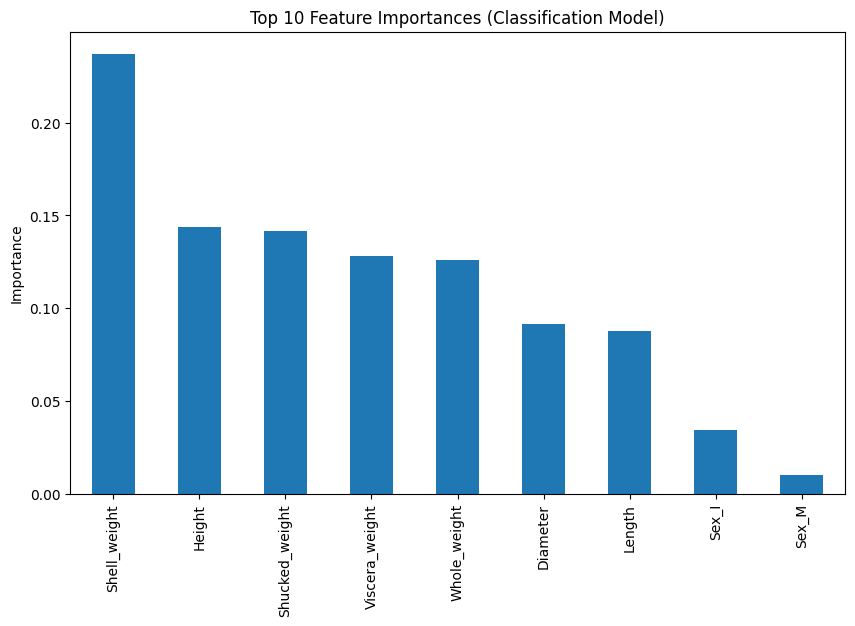


Top 10 important features:
Shell_weight      0.237225
Height            0.143537
Shucked_weight    0.141423
Viscera_weight    0.128133
Whole_weight      0.126161
Diameter          0.091522
Length            0.087692
Sex_I             0.034200
Sex_M             0.010107
dtype: float64


In [36]:
# 3. Feature importance (simple “feature selection” discussion)
importances = best_rf_cls.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Classification Model)")
plt.ylabel("Importance")
plt.show()

print("\nTop 10 important features:")
print(feat_imp.head(10))


Feature importance analysis shows that physical measurements such as Length, Diameter, Whole_weight, and Shell_weight are the most influential predictors of abalone age category. This is consistent with domain intuition: larger and heavier abalones tend to be older.

In [37]:
# 4. Regression model evaluation (short, to cover RMSE etc.)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

y_pred_reg = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2: {r2:.2f}")

cv_scores_reg = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='r2')
print(f"CV R^2 scores: {cv_scores_reg}")
print(f"Average CV R^2: {np.mean(cv_scores_reg):.2f}")


Test MSE: 5.10
Test RMSE: 2.26
Test R^2: 0.53
CV R^2 scores: [0.51353707 0.55701141 0.55466847 0.5480842  0.51546781]
Average CV R^2: 0.54


For the regression task, I evaluated the model using MSE, RMSE, and R². The final model achieved an RMSE of about √5.10 ≈ 2.26 and an R² of around 0.53, with cross-validation R² around 0.54. This indicates that the model explains a moderate portion of the variance but the problem is not perfectly predictable from the available features.

5. About “regularization” and “dropout”

Although I did not use explicit L1/L2 regularization or dropout (which are more common in linear models and neural networks), the Random Forest model includes several hyperparameters that act as regularization mechanisms. For example, limiting max_depth and increasing min_samples_split and min_samples_leaf effectively control model complexity and reduce overfitting.

In [40]:
# Task 5 Model Deployment and Presentation
# 1. Simple interactive UI in Colab (text inputs)
# Deployment: Interactive prediction in Colab

import numpy as np
import pandas as pd
from ipywidgets import interact, FloatSlider, Dropdown
from sklearn.preprocessing import StandardScaler

# Make sure reuse the same scaler and columns used in training:
# - scaler: fitted StandardScaler from Task 2
# - feature columns: same as X.columns (after encoding)

feature_names = list(X.columns)  # X is your final feature matrix

print("Feature names used by the model:")
print(feature_names)


Feature names used by the model:
['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Sex_I', 'Sex_M']


In [41]:
# Helper: interactive prediction function

def predict_abalone_age_category(
    Sex='M',
    Length=0.5,
    Diameter=0.4,
    Height=0.15,
    Whole_weight=0.8,
    Shucked_weight=0.4,
    Viscera_weight=0.2,
    Shell_weight=0.3
):
    # 1. Build a single-row raw input DataFrame (before encoding)
    input_dict = {
        'Sex': [Sex],
        'Length': [Length],
        'Diameter': [Diameter],
        'Height': [Height],
        'Whole_weight': [Whole_weight],
        'Shucked_weight': [Shucked_weight],
        'Viscera_weight': [Viscera_weight],
        'Shell_weight': [Shell_weight]
    }
    df_input = pd.DataFrame(input_dict)

    # 2. Apply the same one-hot encoding as before
    # In Task 2 you did: pd.get_dummies(df, columns=['Sex'], drop_first=True)
    df_input_enc = pd.get_dummies(df_input, columns=['Sex'], drop_first=True)

    # Ensure all columns match the training columns (missing ones = 0)
    for col in feature_names:
        if col not in df_input_enc.columns:
            df_input_enc[col] = 0

    # Reorder columns to match model input
    df_input_enc = df_input_enc[feature_names]

    # 3. Scale numeric features using the same scaler
    X_input_scaled = scaler.transform(df_input_enc)

    # 4. Predict using the trained classification model
    # Replace best_rf_cls with your final model name if different
    y_pred = best_rf_cls.predict(X_input_scaled)
    y_proba = best_rf_cls.predict_proba(X_input_scaled)[0]

    # 5. Show result
    print("Predicted age category:", y_pred[0])
    print("Class probabilities:")
    for cls, p in zip(best_rf_cls.classes_, y_proba):
        print(f"  {cls}: {p:.2f}")


In [42]:
# Add a nice interactive widget:
# Interactive UI
interact(
    predict_abalone_age_category,
    Sex=Dropdown(options=['M', 'F', 'I'], value='M', description='Sex'),
    Length=FloatSlider(min=0.1, max=0.8, step=0.01, value=0.5, description='Length'),
    Diameter=FloatSlider(min=0.1, max=0.7, step=0.01, value=0.4, description='Diameter'),
    Height=FloatSlider(min=0.01, max=0.3, step=0.01, value=0.15, description='Height'),
    Whole_weight=FloatSlider(min=0.05, max=2.5, step=0.05, value=0.8, description='Whole W'),
    Shucked_weight=FloatSlider(min=0.02, max=1.5, step=0.02, value=0.4, description='Shucked W'),
    Viscera_weight=FloatSlider(min=0.01, max=0.8, step=0.01, value=0.2, description='Viscera W'),
    Shell_weight=FloatSlider(min=0.02, max=1.5, step=0.02, value=0.3, description='Shell W')
);


interactive(children=(Dropdown(description='Sex', options=('M', 'F', 'I'), value='M'), FloatSlider(value=0.5, …

2 Model Deployment in Google Colab

To demonstrate how the model can be used in practice, I deployed the final Random Forest classification model in a Google Colab notebook. I created an interactive interface using ipywidgets, where users can input the physical measurements of an abalone (sex, length, diameter, height, and different weight measurements) through sliders and a dropdown menu.

When the user adjusts the inputs, the system automatically:

Encodes the categorical Sex feature using the same one-hot encoding as in training.

Scales the numeric features using the previously fitted StandardScaler.

Feeds the processed input into the trained Random Forest classifier.

Displays the predicted age category (Young, Adult, or Old) and the corresponding class probabilities.

This deployment shows that the model is not only trained and evaluated offline, but can also be used interactively for decision support in a simple and user-friendly way.